Since the model still on beta version we import the specific model from a github repository

In [ ]:
!git clone https://github.com/ourownstory/neural_prophet.git


neural_prophet/  sample_data/


In [ ]:
cd neural_prophet


/content/neural_prophet


In [ ]:
!ls

docs		   LICENSE	neuralprophet	README.md	  setup.py
example_data	   MANIFEST.in	notes		requirements.txt  tests
example_notebooks  mkdocs.yml	pyproject.toml	scripts


In [ ]:
!pip install .

Processing /content/neural_prophet
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 3.0MB/s 
  Created wheel for neuralprophet: filename=neuralprophet-0.2.8-cp36-none-any.whl size=56717 sha256=467706b37079515900a8be767cbdf39ec3ad9d99526d15f83df8c1d39385d01b
  Stored in directory: /tmp/pip-ephem-wheel-cache-7j0zpm96/wheels/26/77/98/d70fac8410b6690e11c1494913e292e37bd7c619decfdfc6a1
Successfully built neuralprophet
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed

**Exploring data**

Text(0.5, 1.0, 'S&P 500 Prices')

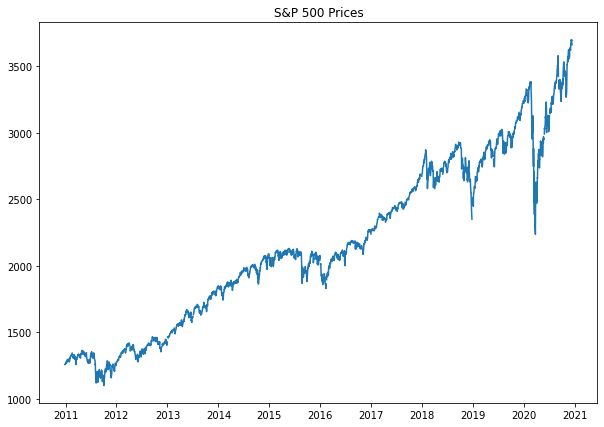

In [ ]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
start = datetime(2010, 12, 13)
end = datetime(2020, 12, 11)
sp500_data = pdr.get_data_fred('sp500', start, end)
plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

In [ ]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE': 'ds', 'sp500': 'y'}) # the usual preprocessing routine
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.05,
                      yearly_seasonality=False,
                      weekly_seasonality=False,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.forecaster._handle_missing_data) - dropped 91 NAN row in 'y'
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/content/neural_prophet/neuralprophet/forecaster.py", line 585, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 1.23E-02
Epoch[100/100]: 100%|██████████| 100/100 [00:13<00:00,  7.39it/s, SmoothL1Loss=0.000485, MAE=43.2, RegLoss=0.000633, MAE_val=285, SmoothL1Loss_val=0.0152]


In [ ]:

def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
  
    """ plot_forecast function - generates and plots the forecasts for a NeuralProphet model
    - model -> a trained NeuralProphet model
    - data -> the dataframe used for training
    - periods -> the number of periods to forecast
    - historic_pred -> a flag indicating whether or not to plot the model's predictions on historic data
    - highlight_steps_ahead -> the number of steps ahead of the forecast line to highlight, used for autoregressive models only"""
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

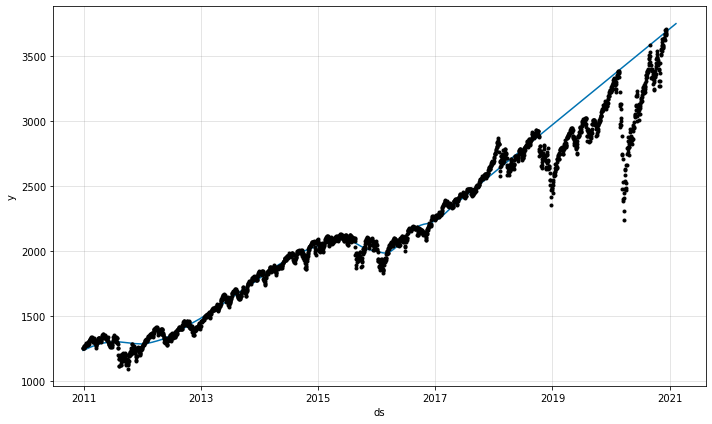

In [ ]:
plot_forecast(model, sp500_data, periods=60)


In [ ]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.5,
                      yearly_seasonality=True,
                      weekly_seasonality=False,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.forecaster._handle_missing_data) - dropped 91 NAN row in 'y'
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/content/neural_prophet/neuralprophet/forecaster.py", line 585, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 8.11E-02
Epoch[100/100]: 100%|██████████| 100/100 [00:16<00:00,  6.03it/s, SmoothL1Loss=0.000466, MAE=43.5, RegLoss=0.00199, MAE_val=249, SmoothL1Loss_val=0.0128]


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



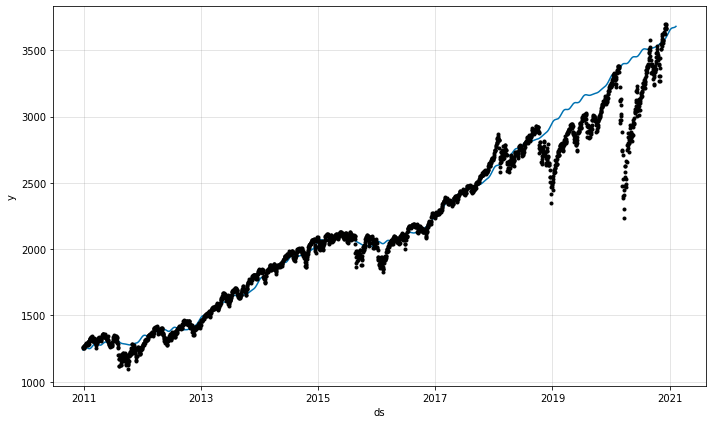

In [ ]:
plot_forecast(model, sp500_data, periods=60, historic_pred=True)

INFO - (NP.forecaster._handle_missing_data) - 22 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 23 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



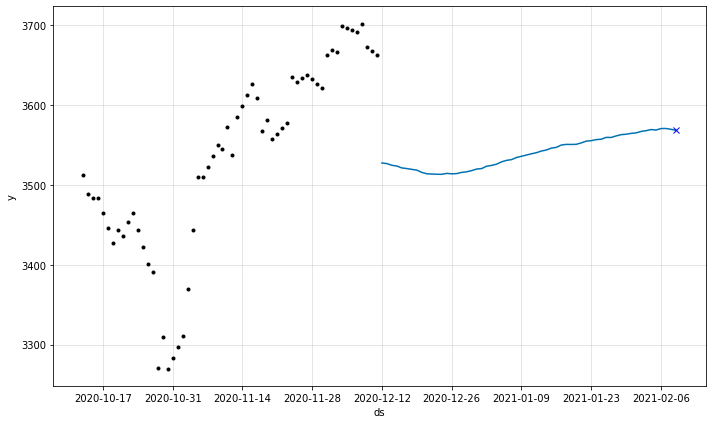

In [ ]:
plot_forecast(model, sp500_data, periods=60, historic_pred=False, highlight_steps_ahead=60)


In [ ]:
model = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO - (NP.forecaster._handle_missing_data) - 1038 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 1129 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

Epoch[100/100]: 100%|██████████| 100/100 [00:53<00:00,  1.88it/s, SmoothL1Loss=0.000646, MAE=51.7, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.294159,1450.479611,0.0
1,0.019173,352.844272,0.0
2,0.007177,211.187791,0.0
3,0.004431,158.238772,0.0
4,0.002710,120.109671,0.0
...,...,...,...
95,0.000707,55.920340,0.0
96,0.000663,52.865969,0.0
97,0.000652,52.266921,0.0
98,0.000650,51.912797,0.0


INFO - (NP.forecaster._handle_missing_data) - 1038 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 1129 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



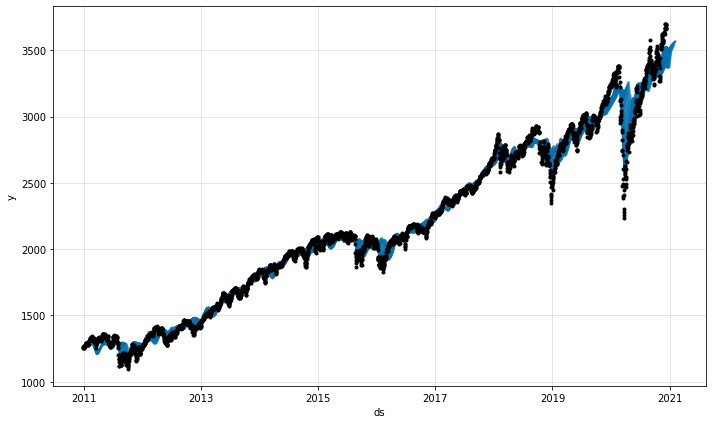

In [ ]:
plot_forecast(model, sp500_data, periods=60, historic_pred=True)
